### Overlap Kmer Distributions vs Accuracy
Test to see if the sum of the deltas between canonical and modified kmer distributions has a correlation with the overall accuracy of the model

In [3]:
from signalalign.hiddenMarkovModel import HmmModel
from signalalign.visualization.plot_em_model_distributions import get_covered_bases
from scipy.stats import norm, invgauss, entropy
from scipy.spatial.distance import euclidean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
model_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_models/template_hmm30.model"
model = HmmModel(model_path, rna=True)

In [5]:
per_pos_acc = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs/30_per_position_data_0.5.csv"
acc_df = pd.read_csv(per_pos_acc)
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/mod_files/yeast_18S_25S_mods.positions"
mod_percent_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/mod_files/misc/mod_file.csv"
mod_df = pd.read_csv(mod_percent_path)



In [6]:
def get_kmer_kl_divergence(model, kmer1, kmer2):
    """Get Kullback–Leibler divergence between the HDP and ONT models for a specific kmer"""
    normal_mean1, normal_sd1 = model.get_event_mean_gaussian_parameters(kmer1)
    normal_mean2, normal_sd2 = model.get_event_mean_gaussian_parameters(kmer2)

    ont_normal_dist1 = norm.pdf(model.linspace, normal_mean1, normal_sd1)
    ont_normal_dist2 = norm.pdf(model.linspace, normal_mean2, normal_sd2)

    kl_divergence = entropy(pk=ont_normal_dist2, qk=ont_normal_dist1, base=2)

    return kl_divergence

def get_kmer_mean_delta(model, kmer1, kmer2):
    """Get Kullback–Leibler divergence between the HDP and ONT models for a specific kmer"""
    normal_mean1, normal_sd1 = model.get_event_mean_gaussian_parameters(kmer1)
    normal_mean2, normal_sd2 = model.get_event_mean_gaussian_parameters(kmer2)

    return np.abs(normal_mean1 - normal_mean2)


In [7]:
get_kmer_kl_divergence(model, "AAAAA", "CAGGA")
get_kmer_mean_delta(model, "AAAAA", "CAGGA")

7.016145999999992

In [18]:
covered_bases = get_covered_bases(reference, positions, kmer_length=5, rna=True)

In [19]:
acc_df.head()
acc_df[(acc_df['contig'] == "RDN25-1") 
       & (acc_df["strand"] == "+")]

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,negative_likelihood_ratio,diagnostic_odds_ratio,f1_score,prevalence,aucroc,avg_precision,brier_score
37,RDN25-1,644,+,Af,0.9835,0.9817,0.9854,0.9857,0.9813,52.7889,0.0189,2786.6692,0.9837,0.5036,0.9962,0.9942,0.0137
38,RDN25-1,648,+,Aa,0.9392,0.9674,0.9139,0.9100,0.9689,29.2420,0.0342,855.0940,0.9378,0.5036,0.9399,0.9644,0.0904
39,RDN25-1,649,+,Cb,0.7116,0.6722,0.7775,0.8344,0.5871,2.0209,0.4948,4.0840,0.7445,0.5036,0.8432,0.8867,0.1836
40,RDN25-1,662,+,Cb,0.8054,0.9518,0.7293,0.6462,0.9668,19.4673,0.0514,378.9750,0.7698,0.5036,0.8564,0.8711,0.1745
41,RDN25-1,775,+,Tl,0.8626,0.8769,0.8491,0.8463,0.8792,7.0040,0.1428,49.0554,0.8613,0.5041,0.9102,0.9261,0.1129
42,RDN25-1,804,+,Gc,0.7942,0.8117,0.7782,0.7700,0.8188,4.2484,0.2354,18.0488,0.7903,0.5036,0.8400,0.8709,0.1672
43,RDN25-1,806,+,Aa,0.5812,0.5522,0.7072,0.8912,0.2667,1.2152,0.8229,1.4768,0.6819,0.5036,0.7098,0.6965,0.3403
44,RDN25-1,816,+,Aa,0.9120,0.9951,0.8520,0.8292,0.9958,199.0123,0.0050,39605.9137,0.9046,0.5031,0.9522,0.9543,0.0798
45,RDN25-1,866,+,Gc,0.6066,0.5757,0.6880,0.8292,0.3812,1.3402,0.7462,1.7960,0.6796,0.5031,0.6877,0.6677,0.3349
46,RDN25-1,875,+,Aa,0.8031,0.9157,0.7373,0.6708,0.9374,10.7102,0.0934,114.7073,0.7743,0.5036,0.8525,0.8769,0.1767


In [20]:
max_delta_values = []
sum_delta_values = []
aucroc_values = []
av_prec_values = []
brier_scores = []
mod_percents = []
specificity_values = []
accuracy_values = []
names = []
min_mod_percent = 94
for x in covered_bases:
    contig = x[0]
    ref_index = x[1]
    print(ref_index)
    strand = "+"
    kmer_sets = x[3]
    if len(ref_index) == 1:
        ref_index = ref_index[0]
        acc_data = acc_df[(acc_df['contig'] == contig) 
               & (acc_df['reference_index'] == ref_index) 
               & (acc_df["strand"] == strand)]
        if len(acc_data) > 0:
#             print(acc_data[["aucroc", "avg_precision", "brier_score"]])
            kl_divs = []
            mean_deltas = []
            for x in kmer_sets:
                sorted_kmers = sorted(x)
                kl_divs.append(get_kmer_kl_divergence(model, sorted_kmers[0], sorted_kmers[1]))
                mean_deltas.append(get_kmer_mean_delta(model, sorted_kmers[0], sorted_kmers[1]))
#             print(mean_deltas)        
            mod_percent = mod_df[(mod_df["contig"] == contig)
                   & (mod_df["pos"] == ref_index+1)]["percent"].iloc[0]
            if mod_percent >= min_mod_percent:
                mod_percents.append(mod_percent)
                aucroc_values.append(acc_data["aucroc"].iloc[0])
                av_prec_values.append(acc_data["avg_precision"].iloc[0])
                brier_scores.append(acc_data["brier_score"].iloc[0])
                specificity_values.append(acc_data["specificity"].iloc[0])
                accuracy_values.append(acc_data["accuracy"].iloc[0])
                if ref_index == 2394:
                    print(f"{contig}_{str(ref_index)}")
                names.append(f"{contig}_{str(ref_index)}")
                max_delta_values.append(max(mean_deltas))
                sum_delta_values.append(np.sum(mean_deltas))
            

[27]
[99]
[105]
[119]
[210]
[301]
[413]
[419]
[435]
[465]
[540]
[561]
[577]
[618]
[631]
[758]
[765]
[795]
[973]
[998]
[1006]
[1125]
[1180]
[1186, 1190]
[1268, 1270]
[1279]
[1289]
[1414]
[1427]
[1571, 1574]
[1638]
[1772]
[1780, 1781]
[644, 648, 649]
[662]
[775]
[804, 806]
[816]
[866]
[875]
[897]
[907]
[959]
[965]
[985, 989]
[1003]
[1041]
[1051, 1055]
[1109]
[1123]
[1132]
[1141]
[1436]
[1448, 1449]
[1887]
[2128, 2132]
[2141]
[2190]
[2196]
[2219]
[2255, 2257, 2259, 2263, 2265]
[2277, 2279, 2280]
[2287]
[2313]
[2336, 2339]
[2346, 2348, 2350]
[2415, 2394]
[2416, 2420]
[2618]
[2633]
[2639]
[2723]
[2728]
[2734]
[2790, 2792]
[2814]
[2825]
[2842]
[2864]
[2869]
[2879]
[2920, 2921, 2922]
[2943, 2945, 2947]
[2958]
[2974]


<IPython.core.display.Javascript object>


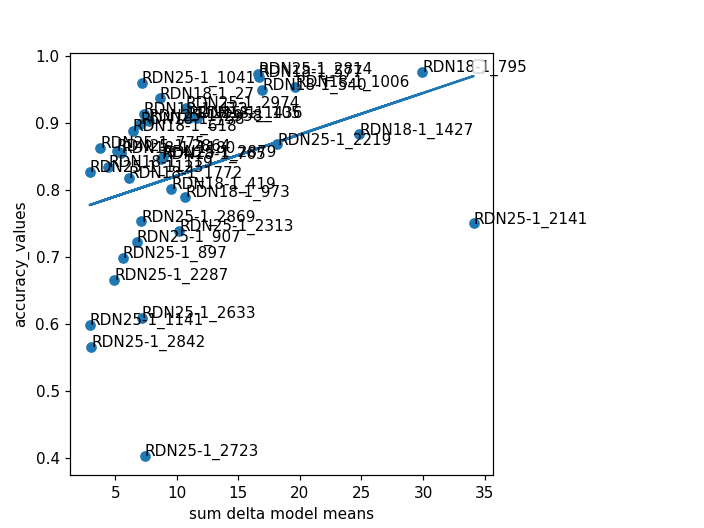

No handles with labels found to put in legend.


In [26]:
%matplotlib notebook


plt.figure()
panel1 = plt.axes([0.1, 0.1, .6, .8])
panel1.set_xlabel('sum delta model means')
panel1.set_ylabel('accuracy_values')
panel1.scatter(max_delta_values, accuracy_values)
for i, txt in enumerate(names):
    panel1.annotate(txt, (max_delta_values[i], accuracy_values[i]))

m, b = np.polyfit(max_delta_values, accuracy_values, 1)
panel1.plot(max_delta_values, m*np.array(max_delta_values) + b)
panel1.legend()
plt.show()